In [1]:
! pip install numpy
! pip install pandas
! pip install scikit-learn
! pip install matplotlib
! pip install nltk

In [37]:
! pip install requests nlpaug

In [3]:
! mkdir -p /your/home/tmp
! TMPDIR=/your/home/tmp pip install torch

  Using cached torch-2.7.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (29 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.6.77-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.6.77-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.6.80-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.5.1.17-py3-none-manylinux_2_28_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.6.4.1-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.3.0.4-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.7.77-py3-none-manyl

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [2]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/aadimprajapati/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/aadimprajapati/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/aadimprajapati/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /home/aadimprajapati/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/aadimprajapati/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagg

True

In [3]:
! pip install textattack

In [53]:
from textattack.augmentation import WordNetAugmenter

In [54]:
augmentor = WordNetAugmenter(pct_words_to_swap=0.5, transformations_per_example=1)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/aadimprajapati/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [55]:
dataset = pd.read_csv('data/Train.csv')

In [56]:
dataset = dataset.drop('Id', axis=1)

In [57]:
dataset = dataset[dataset['Body'].notna() & (dataset['Body'].str.strip() != '')]

In [58]:
print(dataset)

                                                   Body Sentiment Type
0     rule 2 no metes about polarizing political top...        neutral
2     no politics danger now i can make a propaganda...       negative
3                          i am the senate gets stabbed        neutral
4                                     is this a suicide        neutral
5                                               removed        neutral
...                                                 ...            ...
1995                       god gen alpha needs to chill        neutral
1996           people when new generation does anything       positive
1997                        me when minor inconvenience       negative
1998  as a gen z who didn experience brain rot in we...       negative
1999  ah the vine era had a boatload of cringe quote...       negative

[1772 rows x 2 columns]


In [59]:
negative_rows = dataset[dataset['Sentiment Type'] == 'negative'].reset_index(drop=True)

negative_rows

,Body,Sentiment Type
0,no politics danger now i can make a propaganda...,negative
1,the senate was evil,negative
2,weird how you spell wine the pooh,negative
3,lost meme subreddits have similar rules that a...,negative
4,yep left this sub for its toxicity and now i c...,negative
...,...,...
353,dont compare our majestic big changes to a hea...,negative
354,are we actually being nostalgic about our own ...,negative
355,me when minor inconvenience,negative
356,as a gen z who didn experience brain rot in we...,negative


In [60]:
negative_rows['Body'] = [" ".join(augmentor.augment(negative_rows['Body'][x])) for x in range(len(negative_rows))]

negative_rows

,Body,Sentiment Type
0,no government risk now i can reach a propagand...,negative
1,the Senate was wickedness,negative
2,Wyrd how you tour wine-colored the pooh,negative
3,befuddled meme subreddits have like convention...,negative
4,yep left-hand this bomber for its perniciousne...,negative
...,...,...
353,dont compare our majestic self-aggrandising co...,negative
354,are we really being nostalgic about our own sh...,negative
355,me when tike troublesomeness,negative
356,as a gen zee who didn know head hogwash in Wes...,negative


In [61]:
dataset = pd.concat([dataset, negative_rows], ignore_index=True)

In [62]:
main_augmentor = WordNetAugmenter(pct_words_to_swap=0.5, transformations_per_example=4)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/aadimprajapati/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [63]:
main_augmentor.augment('what a lovely day. wish you were here')

['what a adorable Day. want you were here',
 'what a adorable daylight. care you were here',
 'what a endearing Day. bid you were here',
 'what a pin-up daylight. compliments you were here']

In [64]:
def augment_text(text):
    augmented = main_augmentor.augment(text)
    return augmented

In [65]:
def expand_dataset_with_augmentation(df):
    new_rows = []

    for _, row in df.iterrows():
        original_body = row['Body']
        sentiment = row['Sentiment Type']
        augmented_texts = augment_text(original_body)

        for aug_text in augmented_texts:
            new_rows.append({
                'Body': aug_text,
                'Sentiment Type': sentiment
            })

    # Convert the new rows to a DataFrame and concatenate with the original
    augmented_df = pd.DataFrame(new_rows)
    combined_df = pd.concat([df, augmented_df], ignore_index=True)
    
    return combined_df

In [66]:
temp_dataset = dataset.reset_index(drop=True)

In [67]:
temp_dataset

,Body,Sentiment Type
0,rule 2 no metes about polarizing political top...,neutral
1,no politics danger now i can make a propaganda...,negative
2,i am the senate gets stabbed,neutral
3,is this a suicide,neutral
4,removed,neutral
...,...,...
2125,dont compare our majestic self-aggrandising co...,negative
2126,are we really being nostalgic about our own sh...,negative
2127,me when tike troublesomeness,negative
2128,as a gen zee who didn know head hogwash in Wes...,negative


In [68]:
test_df = pd.DataFrame({
    'Body': ['what a lovely day. wish you were here'],
    'Sentiment Type': ['positive']
})

In [69]:
expand_dataset_with_augmentation(test_df)

,Body,Sentiment Type
0,what a lovely day. wish you were here,positive
1,what a endearing Day. want you were here,positive
2,what a endearing daylight. like you were here,positive
3,what a endearing daylight. want you were here,positive
4,what a pin-up daylight. bid you were here,positive


In [70]:
augment_text('what a lovely day. wish you were here')

['what a adorable Day. bid you were here',
 'what a adorable Day. care you were here',
 'what a endearing daylight. want you were here',
 'what a endearing daytime. want you were here']

In [71]:
augmented_dataset = expand_dataset_with_augmentation(dataset)

In [73]:
augmented_dataset

,Body,Sentiment Type
0,rule 2 no metes about polarizing political top...,neutral
1,no politics danger now i can make a propaganda...,negative
2,i am the senate gets stabbed,neutral
3,is this a suicide,neutral
4,removed,neutral
...,...,...
10211,as a gen izzard who didn recognise heading bun...,negative
10212,ah the vine epoch had a boatload of wince Cita...,negative
10213,ah the vine epoch had a boatload of wince refe...,negative
10214,ah the vine era had a boatload of squinch cred...,negative


In [74]:
dataset

,Body,Sentiment Type
0,rule 2 no metes about polarizing political top...,neutral
1,no politics danger now i can make a propaganda...,negative
2,i am the senate gets stabbed,neutral
3,is this a suicide,neutral
4,removed,neutral
...,...,...
2125,dont compare our majestic self-aggrandising co...,negative
2126,are we really being nostalgic about our own sh...,negative
2127,me when tike troublesomeness,negative
2128,as a gen zee who didn know head hogwash in Wes...,negative


In [76]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [77]:
wnl = WordNetLemmatizer()

In [78]:
def preprocessText(text):
    text = text.lower()

    tokens = word_tokenize(text)

    filtered = [token for token in tokens if token.isalpha()]

    lemmas = [wnl.lemmatize(x) for x in filtered]

    return ' '.join(lemmas)


In [79]:
augmented_dataset['processedText'] = augmented_dataset['Body'].apply(preprocessText)
augmented_dataset['processedText']

0        rule no mete about polarizing political topic ...
1        no politics danger now i can make a propaganda...
2                              i am the senate get stabbed
3                                        is this a suicide
4                                                  removed
                               ...                        
10211    a a gen izzard who didn recognise heading bunc...
10212    ah the vine epoch had a boatload of wince cita...
10213    ah the vine epoch had a boatload of wince refe...
10214    ah the vine era had a boatload of squinch cred...
10215    ah the vine era had a boatload of wince mentio...
Name: processedText, Length: 10216, dtype: object

In [80]:
augmented_dataset['processedSentiment'] = augmented_dataset['Sentiment Type'].apply(preprocessText)

augmented_dataset['processedSentiment']

0         neutral
1        negative
2         neutral
3         neutral
4         neutral
           ...   
10211    negative
10212    negative
10213    negative
10214    negative
10215    negative
Name: processedSentiment, Length: 10216, dtype: object

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [82]:
X = augmented_dataset['processedText']
y = augmented_dataset['processedSentiment']

In [83]:
X

0        rule no mete about polarizing political topic ...
1        no politics danger now i can make a propaganda...
2                              i am the senate get stabbed
3                                        is this a suicide
4                                                  removed
                               ...                        
10211    a a gen izzard who didn recognise heading bunc...
10212    ah the vine epoch had a boatload of wince cita...
10213    ah the vine epoch had a boatload of wince refe...
10214    ah the vine era had a boatload of squinch cred...
10215    ah the vine era had a boatload of wince mentio...
Name: processedText, Length: 10216, dtype: object

In [84]:
y = y.str.strip().str.lower() 

In [85]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_encoded = encoder.fit_transform(y)

In [86]:
print(np.unique(y_encoded))  

[0 1 2]


   Value  Count
0      0   3573
1      1   3491
2      2   3152


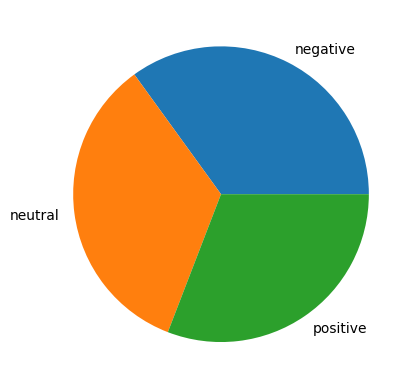

In [87]:
unique_vals, counts = np.unique(y_encoded, return_counts=True)
dt = pd.DataFrame(zip(unique_vals, counts), columns=['Value', 'Count'])
print(dt)

items = dt['Count']

plt.pie(items, labels = encoder.inverse_transform(dt['Value']))
plt.show() 

In [88]:
y_encoded

array([1, 0, 1, ..., 0, 0, 0], shape=(10216,))

In [89]:
list(encoder.inverse_transform(np.unique(y_encoded)))

['negative', 'neutral', 'positive']

In [90]:
X

0        rule no mete about polarizing political topic ...
1        no politics danger now i can make a propaganda...
2                              i am the senate get stabbed
3                                        is this a suicide
4                                                  removed
                               ...                        
10211    a a gen izzard who didn recognise heading bunc...
10212    ah the vine epoch had a boatload of wince cita...
10213    ah the vine epoch had a boatload of wince refe...
10214    ah the vine era had a boatload of squinch cred...
10215    ah the vine era had a boatload of wince mentio...
Name: processedText, Length: 10216, dtype: object

In [92]:
vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1, 2), max_df=0.9, min_df=5)

x_vect = vectorizer.fit_transform(augmented_dataset['processedText'])

In [93]:
xtrain, xtest, ytrain, ytest = train_test_split(x_vect, y_encoded, test_size=0.2, random_state=42)

In [94]:
print(y.value_counts())

processedSentiment
negative    3573
neutral     3491
positive    3152
Name: count, dtype: int64


In [95]:
xtrain

<8172x4704 sparse matrix of type '<class 'numpy.float64'>'
	with 56632 stored elements in Compressed Sparse Row format>

In [96]:
ytrain

array([0, 1, 0, ..., 2, 0, 1], shape=(8172,))

In [97]:
model = MultinomialNB()

In [98]:
model.fit(xtrain, ytrain)

MultinomialNB()

In [99]:
ypred = model.predict(xtest)

In [100]:
accuracy_score(ytest, ypred)

0.7270058708414873

In [101]:
cm = confusion_matrix(ytest, ypred)

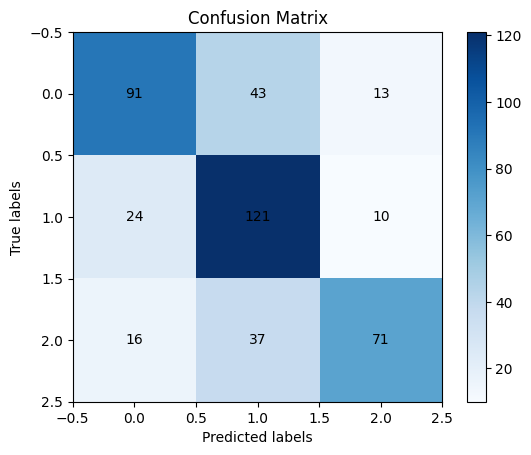

In [58]:
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Add labels
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.colorbar(im)
plt.show()

In [102]:
caption = "Every day is a fresh start—stay hopeful, stay kind, stay you."
caption_processed = preprocessText(caption)

caption_processed

'every day is a fresh hopeful stay kind stay you'

In [103]:
caption_processed_vect = vectorizer.transform([caption_processed])

caption_processed_vect

<1x4704 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [104]:
ypred = model.predict(caption_processed_vect)

ypred

array([2])

In [105]:
list(encoder.inverse_transform(ypred))

['positive']

In [42]:
! pip install joblib

In [106]:
import joblib

In [107]:
joblib.dump(model, 'sentimentanalyze.pkl')

['sentimentanalyze.pkl']

In [108]:
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [109]:
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']